## Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### The dataset is from the blood transfusion service center in Hsin-Chu city in Taiwan which contains the information of blood donors in the university. The service center drives to different universities in Hsin_Chu City to collect blood donated about every three months. The main objective of building a model is to predect whether or not the donor will donate the blood next time when the bus comes to the university. To build a RFMTC model, we selcted 748 donors at random from the donors database. each of these 748 donars include the below attributes
#### R(recency - months since last donation)
#### F(frequency - total number of donations)
#### M(monetary - total blood donated in c.c.)
#### T(time - months since first donation)
#### binary variable represents whether he/she donated blood in March 2007(1 for donating blood, 0 for not donating blood)

## Loading the data

In [2]:
df = pd.read_csv('transfusion.data')

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
len(df)

748

In [5]:
df.shape

(748, 5)

In [6]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [7]:
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

## Rename 

In [8]:
df.rename(columns={'whether he/she donated blood in March 2007':'target'}, inplace=True)
df.columns = df.columns.str.lower()

In [9]:
df.head()

,recency (months),frequency (times),monetary (c.c. blood),time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Checking for blood donations

#### To predict wheather the same donor will donate the blood next time when the bus comes to campus. The possible outcomes are binary values 
 0 - for not donating the blood  and 1 - for donating the blood


0    570
1    178
Name: target, dtype: int64
whether he/she donated blood in March 2007:  [1 0]
total number of donations in df: 2


<AxesSubplot:>

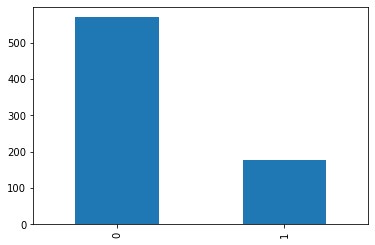

In [10]:
print(df['target'].value_counts())
print("whether he/she donated blood in March 2007: ", df.target.unique())
print("total number of donations in df:",len(df.target.unique()))
df['target'].value_counts()[:20].plot(kind='bar')

<AxesSubplot:xlabel='recency (months)', ylabel='count'>

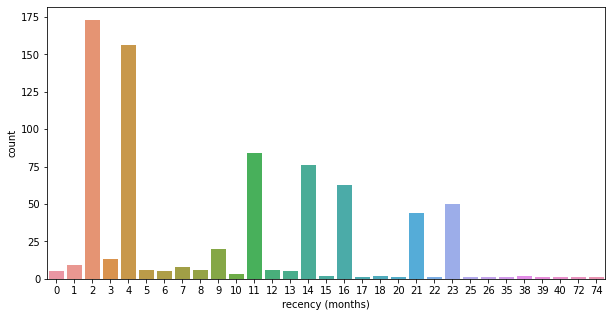

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='recency (months)', data=df)

<AxesSubplot:xlabel='frequency (times)', ylabel='count'>

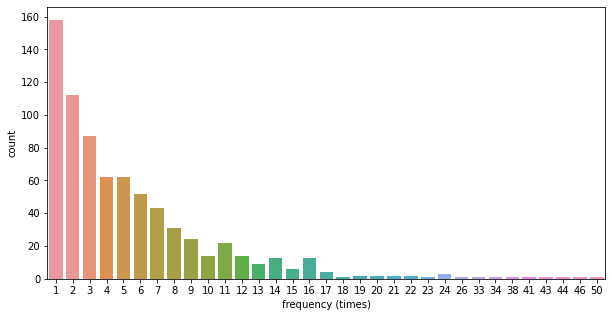

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='frequency (times)', data=df)

<AxesSubplot:xlabel='monetary (c.c. blood)', ylabel='count'>

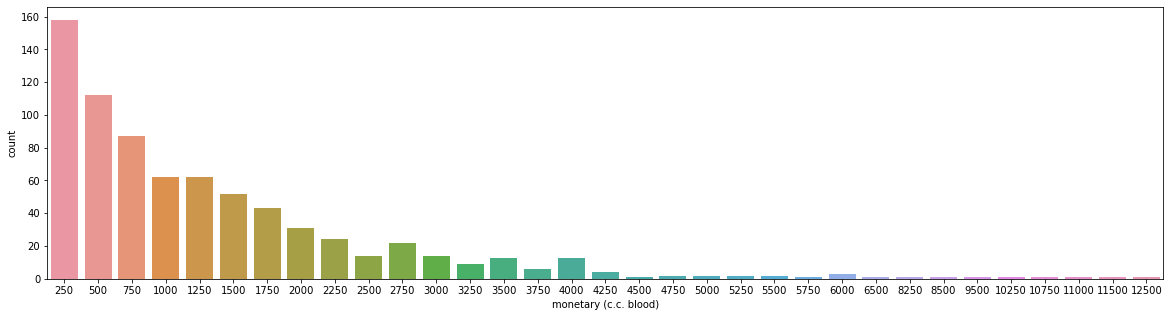

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(x='monetary (c.c. blood)', data=df)

<AxesSubplot:xlabel='time (months)', ylabel='count'>

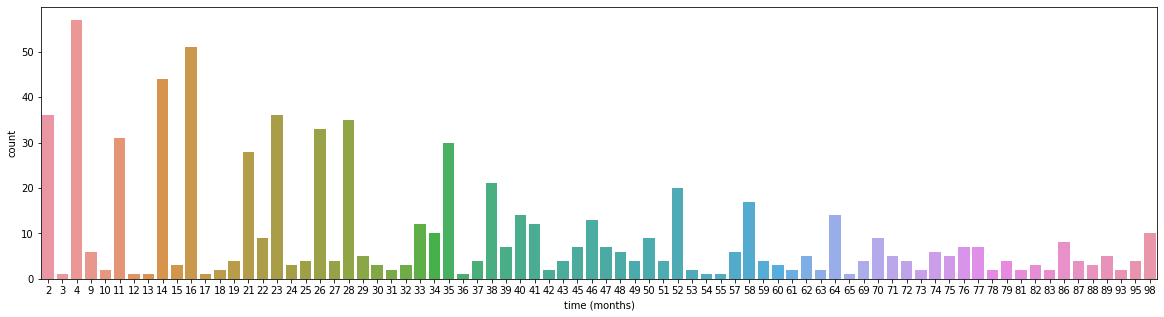

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x='time (months)', data=df)

In [15]:
df.describe()

,recency (months),frequency (times),monetary (c.c. blood),time (months),target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [16]:
df['target'].value_counts(normalize= True)

0    0.762032
1    0.237968
Name: target, dtype: float64

Seeing the above values for donated and not donated, a classifier which predicts not donated target always would achieve an accuracy of 76% of good classification without using any information from the data itself. this problem is called as class imbalance

<AxesSubplot:ylabel='target'>

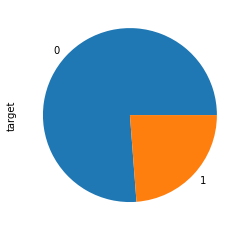

In [17]:
df['target'].value_counts()[:20].plot(kind='pie')

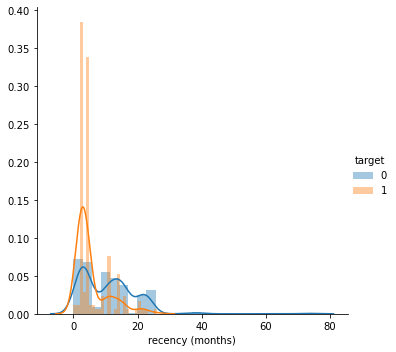

In [18]:
#From the below graph we can say that the peak corresponding to the people who donated recently (1-2 months) 
#will likely to donate blood
sns.FacetGrid(df, hue='target', height=5).map(sns.distplot,'recency (months)').add_legend()
plt.show()

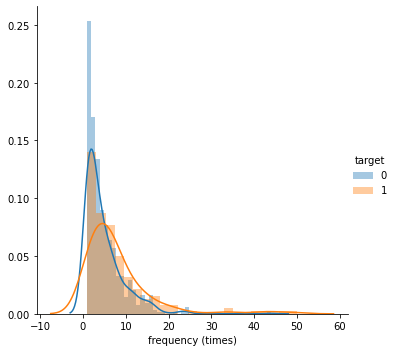

In [19]:
#There is peak corresponding to the people who donated only 0-1 times will less likely 
#to donate than the people who danated 2-3 times
# people with more number of blood donations will donate the blood
sns.FacetGrid(df, hue='target', height=5).map(sns.distplot,'frequency (times)').add_legend()
plt.show()

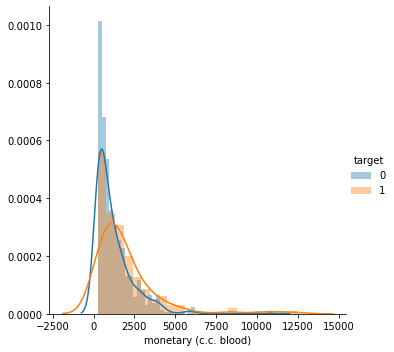

In [20]:
# the peak corresponds to the people who donated more than 5 times
sns.FacetGrid(df, hue='target', height=5).map(sns.distplot,'monetary (c.c. blood)').add_legend()
plt.show()

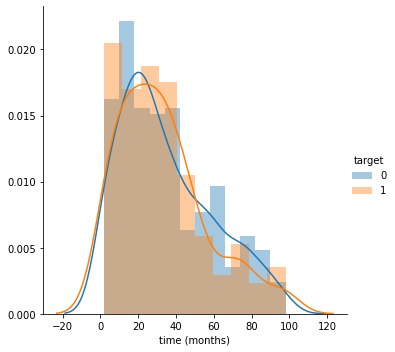

In [21]:
#there is a peak corresponding to the people who donated recently(6-20 months)will not donate
sns.FacetGrid(df, hue='target', height=5).map(sns.distplot,'time (months)').add_legend()
plt.show()

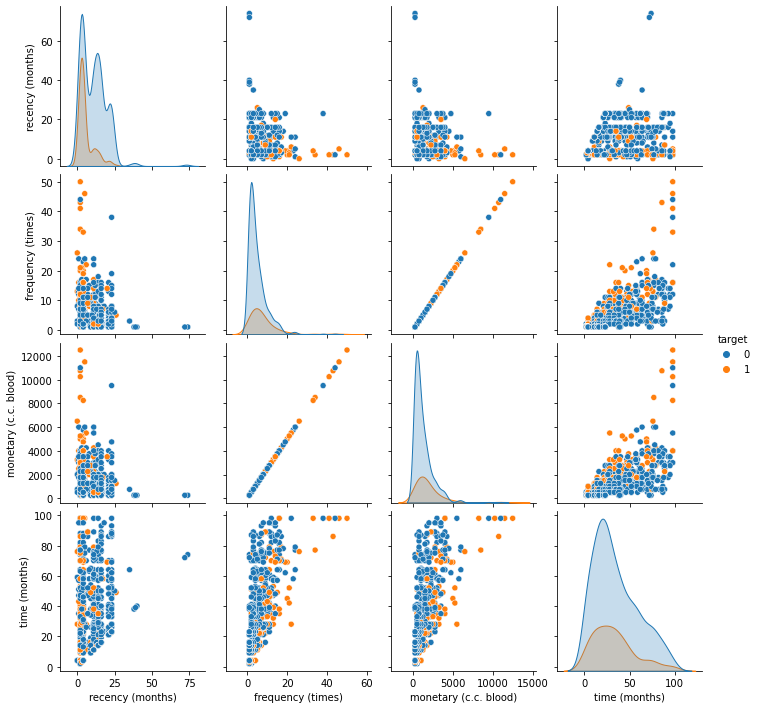

In [22]:
sns.pairplot(df, hue="target")

From the diagonal plots, we don't see any features that individually could help at separating the two targets and there is no striking combinations when we look at a pair of features. But, the Monetary and frequency features are perfectly correlated that is data points are aligned diagonally.
From this we can notice that the data set suffers from target imbalance and correlated features.

<AxesSubplot:>

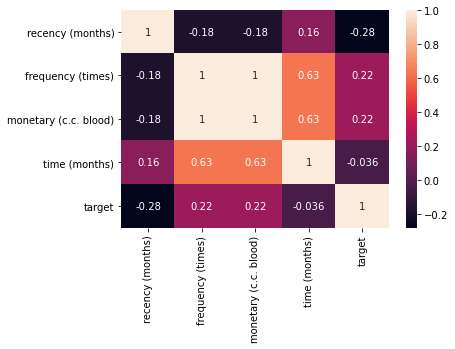

In [23]:
sns.heatmap(df.corr(), annot=True)

In [24]:
res = df.groupby("target").corr()
res

recency (months)  frequency (times)  \
target                                                              
0      recency (months)               1.000000          -0.126862   
       frequency (times)             -0.126862           1.000000   
       monetary (c.c. blood)         -0.126862           1.000000   
       time (months)                  0.175247           0.654033   
1      recency (months)               1.000000          -0.191101   
       frequency (times)             -0.191101           1.000000   
       monetary (c.c. blood)         -0.191101           1.000000   
       time (months)                  0.070599           0.740233   

                              monetary (c.c. blood)  time (months)  
target                                                              
0      recency (months)                   -0.126862       0.175247  
       frequency (times)                   1.000000       0.654033  
       monetary (c.c. blood)               1.000000       0.654033  
       time (months)                       0.654033       1.000000  
1      recency (months)                   -0.191101       0.070599  
       frequency (times)                   1.000000       0.740233  
       monetary (c.c. blood)               1.000000       0.740233  
       time (months)                       0.740233       1.000000

<AxesSubplot:ylabel='target-None'>

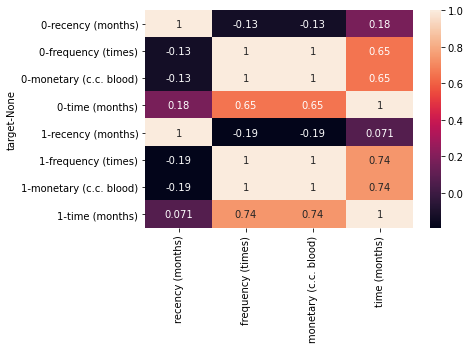

In [25]:
sns.heatmap(res, annot=True)

#### here we can see that the frequency and monetary are correlated well, that is the donors donate a certain amount of blood for each donation

In [26]:
df['each_time_doantion'] = (df['monetary (c.c. blood)']/df['frequency (times)'])
df['each_time_doantion']

0      250.0
1      250.0
2      250.0
3      250.0
4      250.0
       ...  
743    250.0
744    250.0
745    250.0
746    250.0
747    250.0
Name: each_time_doantion, Length: 748, dtype: float64

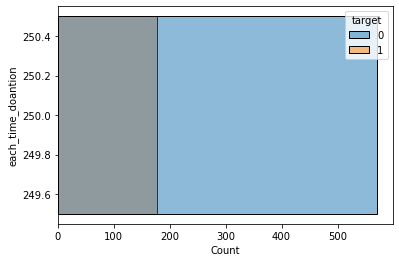

In [27]:
sns.histplot(data=df, y='each_time_doantion', hue='target')
plt.show()

In [28]:
df['waiting period'] = ((df['time (months)'] - df['recency (months)'])/df['frequency (times)'])
df[['recency (months)','target','waiting period']].head(10)

,recency (months),target,waiting period
0,2,1,1.920000
1,0,1,2.153846
2,1,1,2.125000
3,2,1,2.150000
4,1,0,3.166667
5,4,0,0.000000
6,2,1,1.714286
7,1,0,2.833333
8,2,1,2.222222
9,5,1,2.021739


In [29]:
df[['recency (months)','target','waiting period']].tail(10)

,recency (months),target,waiting period
738,23,0,0.000000
739,23,0,7.250000
740,23,0,0.000000
741,23,0,9.285714
742,16,0,23.333333
743,23,0,7.500000
744,21,0,15.500000
745,23,0,13.000000
746,39,0,0.000000
747,72,0,0.000000


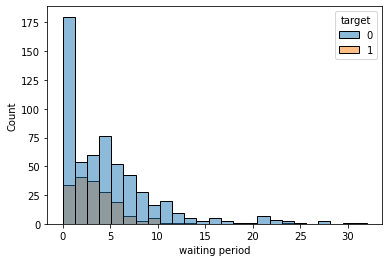

In [30]:
#sns.FacetGrid(df, hue='target', height=5).map(sns.distplot,'waiting period').add_legend()
sns.histplot(data=df, x='waiting period', hue='target')
plt.show()

#### from the above figure it is clear that those who donate blood frequently are much more likely to donate blood than others. donars with waiting period less than 2 months are more likely to donate blood than others and one time donors whose waiting period is 0 because they do not donate blood after their first time.

In [31]:
df['target'].value_counts()

0    570
1    178
Name: target, dtype: int64

## Before Resampling

In [32]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size = 0.2, random_state=42)
train_x=train[['recency (months)','frequency (times)','monetary (c.c. blood)','time (months)']]
train_y=train.target
test_x=test[['recency (months)','frequency (times)','monetary (c.c. blood)','time (months)']]
test_y=test.target

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

In [34]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
prediction = lr.predict(test_x)
print(f'\nAccuracy: {metrics.accuracy_score(prediction,test_y):.2f}')


Accuracy: 0.76


In [35]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_x,train_y)
y_pred2 = kn.predict(test_x)
print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred2):.2f}')


Accuracy: 0.77


In [36]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
y_pred3 = dt.predict(test_x)

print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred3):.2f}')


Accuracy: 0.66


In [37]:
rf = RandomForestClassifier(n_estimators=5, random_state=7)
rf.fit(train_x,train_y)
y_pred4 = rf.predict(test_x)
print(f'\nAccuracy: {metrics.accuracy_score(test_y, y_pred4):.2f}')


Accuracy: 0.73


## Resampling

#### The technique used to deal with imbalanced dataset. Here i have taken two types , removing samples from the majority class(under sampling) and adding more samples to the minority class(over sampling)
#### Here under sampling is used

0    178
1    178
Name: target, dtype: int64


<AxesSubplot:>

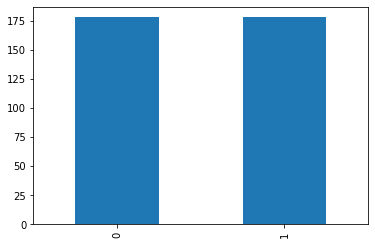

In [32]:
from sklearn.utils import resample

df_majority = df[df.target==1]
df_minority = df[df.target==0]

# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=178, random_state=42)

# combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

# shuffle the dataset to prevent getting similar samples
df = df.sample(frac=1, random_state=0)

print(df.target.value_counts())
df.target.value_counts().plot(kind='bar')

Splitting the dataset into train and test dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train,test = train_test_split(df, test_size = 0.2, random_state=42)
train_x=train[['recency (months)','frequency (times)','monetary (c.c. blood)','time (months)']]
train_y=train.target
test_x=test[['recency (months)','frequency (times)','monetary (c.c. blood)','time (months)']]
test_y=test.target

In [35]:
train_x.head()

,recency (months),frequency (times),monetary (c.c. blood),time (months)
554,2,4,1000,23
176,11,4,1000,16
581,2,1,250,2
537,2,6,1500,26
695,17,7,1750,58


In [36]:
train_x.shape

(284, 4)

In [37]:
test_x.head()

,recency (months),frequency (times),monetary (c.c. blood),time (months)
626,9,9,2250,54
118,1,7,1750,57
628,2,5,1250,63
156,2,1,250,2
677,23,19,4750,62


In [38]:
test_x.shape

(72, 4)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

In [40]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
prediction = lr.predict(test_x)
print(f'\nAccuracy: {metrics.accuracy_score(prediction,test_y):.2f}')


Accuracy: 0.71


In [41]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_x,train_y)
y_pred2 = kn.predict(test_x)
print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred2):.2f}')


Accuracy: 0.62


In [42]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
y_pred3 = dt.predict(test_x)
print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred3):.2f}')


Accuracy: 0.67


In [43]:
rf = RandomForestClassifier(n_estimators=5, random_state=7)
rf.fit(train_x,train_y)
y_pred4 = rf.predict(test_x)
print(f'\nAccuracy: {metrics.accuracy_score(test_y, y_pred4):.2f}')


Accuracy: 0.68


In [44]:
#from sklearn.utils import resample

#df_majority = df[df.target==1]
#df_minority = df[df.target==0]

## downsample majority class
#df_majority_downsampled = resample(df_majority, replace=True, n_samples=570, random_state=42)

## combine majority class with upsampled minority class
#df = pd.concat([df_minority, df_majority_downsampled])

## shuffle the dataset to prevent getting similar samples
#df = df.sample(frac=1, random_state=0)

#print(df.target.value_counts())
#df.target.value_counts().plot(kind='bar')



##0    570
##1    570

In [45]:
#from sklearn.model_selection import train_test_split
#train,test = train_test_split(df, test_size = 0.2, random_state=42)
#train_x=train[['recency (months)','frequency (times)','monetary (c.c. blood)','time (months)']]
#train_y=train.target
#test_x=test[['recency (months)','frequency (times)','monetary (c.c. blood)','time (months)']]
#test_y=test.target

In [46]:
#lr = LogisticRegression()
#lr.fit(train_x,train_y)
#prediction = lr.predict(test_x)
#print(f'\nAccuracy: {metrics.accuracy_score(prediction,test_y):.2f}')


#Accuracy: 0.67

In [47]:
#kn = KNeighborsClassifier(n_neighbors=5)
#kn.fit(train_x,train_y)
#y_pred2 = kn.predict(test_x)
#print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred2):.2f}')


#Accuracy: 0.69

In [48]:
#dt = DecisionTreeClassifier()
#dt.fit(train_x,train_y)
#y_pred3 = dt.predict(test_x)
#print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred3):.2f}')


#Accuracy: 0.82

In [49]:
#rf = RandomForestClassifier(n_estimators=5, random_state=7)
#rf.fit(train_x,train_y)
#y_pred4 = rf.predict(test_x)
#print(f'\nAccuracy: {metrics.accuracy_score(test_y, y_pred4):.2f}')




#Accuracy: 0.81

In [50]:
lr = LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [51]:
x_new = np.array([[23, 1, 250, 23]])
prediction = lr.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: [0]


In [52]:
x_new = np.array([[2, 50, 12500, 98]])
prediction = lr.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: [1]


## Check for variance

If the attributes in our dataset are more greater than the other attribute, then it will affect the models ability to learn from the other attributes

In [35]:
train_x.var().round(2)

recency (months)              51.22
frequency (times)             47.09
monetary (c.c. blood)    2943098.19
time (months)                629.11
dtype: float64

## Applying normalization

correcting this high differnce is called normaliztion. it should be done before training the model otherwise the attribute may get more importance by the model.

In [36]:
train_x_normed, test_x_normed = train_x.copy(), test_x.copy()
col_to_normalize = 'monetary (c.c. blood)'
for df_ in [train_x_normed, test_x_normed]:
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    df_.drop(columns = col_to_normalize, inplace=True)
    
train_x_normed.var().round(2)

recency (months)      51.22
frequency (times)     47.09
time (months)        629.11
monetary_log           0.84
dtype: float64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

#### After Normalization

In [38]:
lr = LogisticRegression()
lr.fit(train_x_normed,train_y)
prediction = lr.predict(test_x_normed)
print(f'\nAccuracy: {metrics.accuracy_score(test_y,prediction):.2f}')


Accuracy: 0.69


In [39]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_x_normed,train_y)
y_pred2 = kn.predict(test_x_normed)
print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred2):.2f}')


Accuracy: 0.67


In [40]:
dt = DecisionTreeClassifier()
dt.fit(train_x_normed,train_y)
y_pred3 = dt.predict(test_x_normed)
print(f'\nAccuracy: {metrics.accuracy_score(test_y,y_pred3):.2f}')


Accuracy: 0.69


In [41]:
rf = RandomForestClassifier(n_estimators=5, random_state=7)
rf.fit(train_x_normed,train_y)
y_pred4 = rf.predict(test_x_normed)
print(f'\nAccuracy: {metrics.accuracy_score(test_y, y_pred4):.2f}')


Accuracy: 0.71


In [42]:
rf = RandomForestClassifier()
rf.fit(train_x_normed,train_y)

RandomForestClassifier()

In [43]:
x_new = np.array([[23, 1, 250, 23]])
prediction = rf.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: [0]


In [44]:
x_new = np.array([[2, 50, 12500, 98]])
prediction = rf.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: [1]


### Accuracy of different models

#### Logistic regression accuracy: 0.76
#### K-Neighbor accuracy: 0.77
#### Decision tree accuracy: 0.66
#### Random forest accuracy: 0.73

### Accuracy of different models after resampling

#### Logistic regression accuracy: 0.71
#### K-Neighbor accuracy: 0.62
#### Decision tree accuracy: 0.67
#### Random forest accuracy: 0.68

### Accuracy of different models after resampling and normalization

#### Logistic regression accuracy: 0.69
#### K-Neighbor accuracy: 0.67
#### Decision tree accuracy: 0.69
#### Random forest accuracy: 0.71
